# Лабораторная работа 4. Цифровая обработка изображений.
> Выполнена студентом: **Гришин Е.В. 22ВВИм2**

Цель лабораторной работы:
1. Бинаризация
2. Выделение границ
3. Методы анализа изображений
4. Локальные особенности. Особые точки.


## Импорт библиотек

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np

image_path = 'images/bad_text.jpg'

## Загрузка изображения

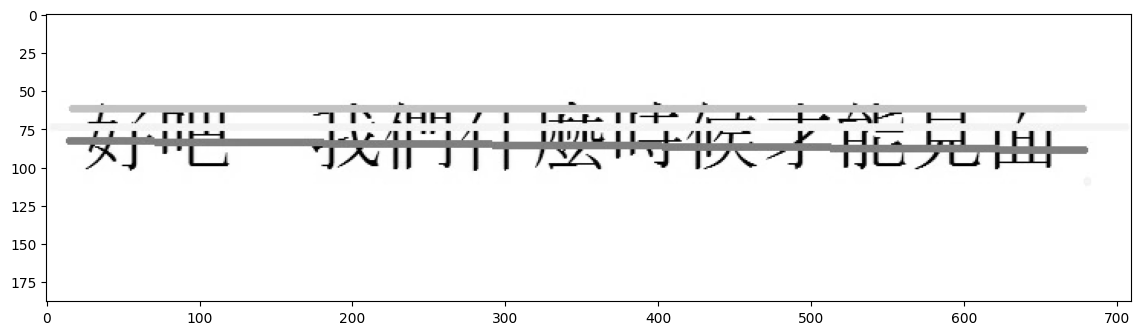

In [2]:
# Загрузка изображения
bgr_image = cv.imread(image_path)
gray_image = cv.cvtColor(bgr_image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 4))
plt.imshow(gray_image, cmap='gray')

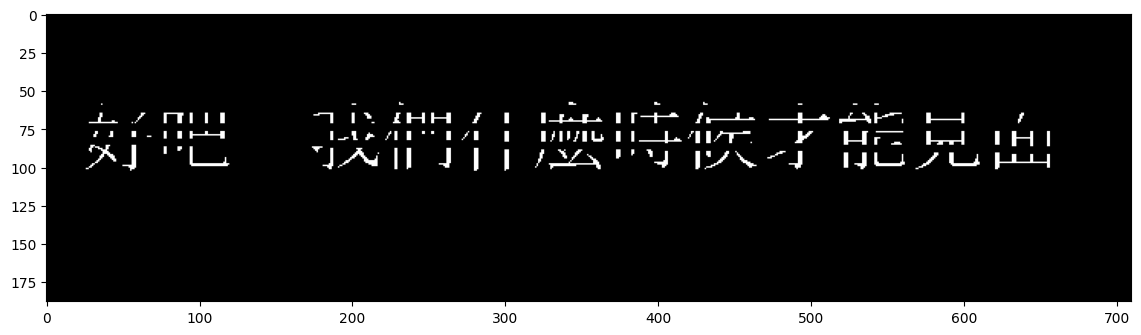

In [3]:
value = 100
_, thresholded = cv.threshold(gray_image, value, 255, cv.THRESH_BINARY + cv.THRESH_BINARY_INV)

plt.figure(figsize=(14,4))
plt.imshow(thresholded, cmap='gray')

In [4]:
cv.imwrite('images/better_text.jpg', cv.cvtColor(thresholded, cv.COLOR_GRAY2BGR))

True

![result image](images/better_text.jpg)